In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple, defaultdict

# Define constants
NUM_ROWS = 12
INITIAL_RADIUS = 30
RADIUS_INCREMENT = 5

# Define the Party namedtuple
Party = namedtuple('Party', ['name', 'color', 'size'])

parties = [
    Party('Party 1', '#A11770', 142),
    Party('Party 2', '#D9669E', 13),
    Party('Party 3', '#FE9F10', 257),
    Party('Party 4', '#0690C5', 73),
    Party('Party 5', '#8D6026', 72),
    Party('Unassigned', 'unassigned', 20),
]

NUM_DEPUTIES = sum(p.size for p in parties)

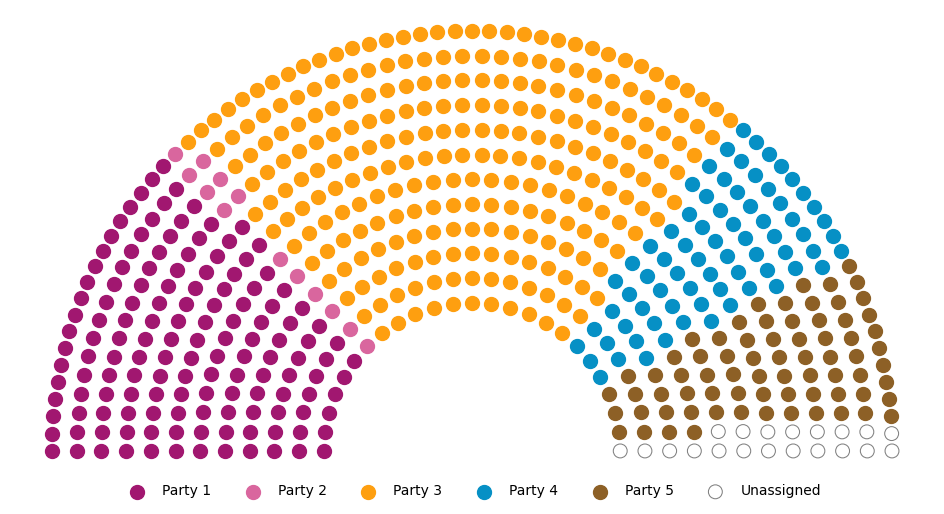

In [2]:
def calculate_radius(num_rows, initial_radius, radius_increment):
    """Calculate the radius for each row.
    
    Parameters:
        - num_rows (int): The number of rows.
        - initial_radius (float): The initial radius.
        - radius_increment (float): The increment of the radius.
    
    Returns:
        - list: The list of radii for each row."""
    return [initial_radius + i * radius_increment for i in range(num_rows)]

def calculate_arc_lengths(radius):
    """Calculate the arc lengths for each radius.
    
    Parameters:
        - radius (list): The list of radii."""
    return [r * np.pi for r in radius]

def calculate_deputies_per_row(num_deputies, arc_lengths, total_arc_length):
    """Calculate the number of deputies per row.
    
    Parameters:
        - num_deputies (int): The total number of deputies.
        - arc_lengths (list): The list of arc lengths for each row.
        - total_arc_length (float): The total arc length.
        
    Returns:
        - list: The list of deputies per row."""
    deputies_per_row = [int(num_deputies * (arc_length / total_arc_length)) for arc_length in arc_lengths]

    # Distribute the remaining deputies
    diff = num_deputies - sum(deputies_per_row)
    deputies_per_row[-1] += diff
    return deputies_per_row

def generate_points(num_rows, radii, deputies_per_row):
    """Generate the points for each deputy.
    
    Parameters:
        - num_rows (int): The number of rows.
        - radii (list): The list of radii for each row.
        - deputies_per_row (list): The list of deputies per row.
        
    Returns:
        - list: The list of points for each deputy."""
    points = []
    for row in range(num_rows):
        radius = radii[row]
        num_deputies_row = deputies_per_row[row]
        angles = np.linspace(0, np.pi, num_deputies_row)
        x = radius * np.cos(angles)
        y = radius * np.sin(angles)
        for i in range(num_deputies_row):
            points.append((radius, angles[i], x[i], y[i]))
    return sorted(points, key=lambda x: x[1], reverse=True)


def main(num_rows, initial_radius, radius_increment):
    """Main function to generate deputies' positions.
    
    Parameters:
        - num_rows (int): The number of rows.
        - initial_radius (float): The initial radius.
        - radius_increment (float): The increment of the radius.
    
    Returns:
        - list: The list of deputies"""
    radius = calculate_radius(num_rows, initial_radius, radius_increment)
    arc_lengths = calculate_arc_lengths(radius)
    total_arc_length = sum(arc_lengths)
    deputies_per_row = calculate_deputies_per_row(NUM_DEPUTIES, arc_lengths, total_arc_length)
    points = generate_points(num_rows, radius, deputies_per_row)

    Deputy = namedtuple('Deputy', ['x', 'y', 'radius', 'angle'])
    return [Deputy(x, y, radius, angle) for (radius, angle, x, y) in points]

def plot_deputies(deputies, parties):
    """Plot the deputies on a chart.
    
    Parameters:
        - deputies (list): The list of deputies.
        - parties (list): The list of parties."""
    deputies_by_party = defaultdict(list)

    current_index = 0

    for party in parties:
        party_deputies = deputies[current_index:current_index + party.size]
        deputies_by_party[party.name].extend(party_deputies)
        current_index += party.size

    deputies_by_party = dict(deputies_by_party)

    plt.figure(figsize=(12, 6))

    for party in parties:
        color = party.color
        party_deputies = deputies_by_party[party.name]

        label = party.name

        for deputy in party_deputies:
            if color == 'unassigned':
                plt.scatter(deputy.x, deputy.y, s=100, facecolors='none', edgecolors='grey', linewidth=0.75, label=label)
            else:
                plt.scatter(deputy.x, deputy.y, s=100, alpha=1, color = color, label=label)

            label = ""

    plt.gca().set_aspect('equal')
    plt.axis('off')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0) , ncol=6, frameon=False)

    plt.show()

deputies = main(NUM_ROWS, INITIAL_RADIUS, RADIUS_INCREMENT)
plot_deputies(deputies, parties)

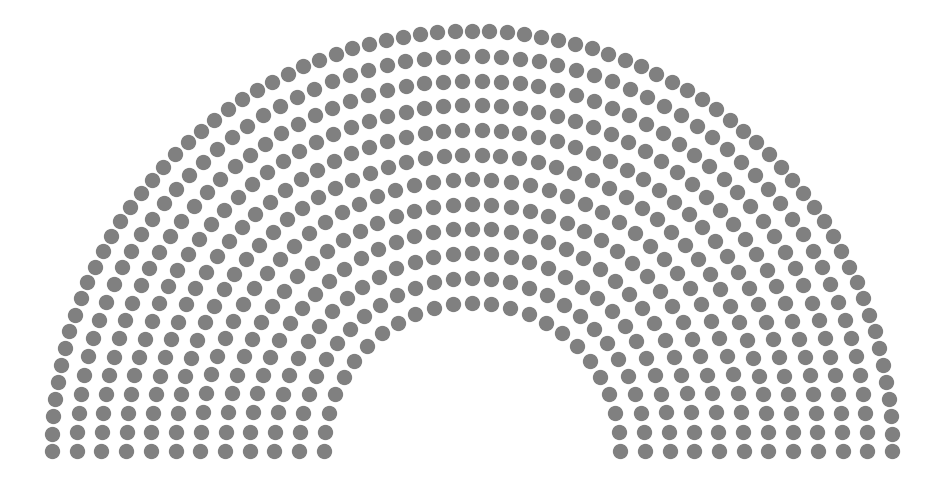

In [3]:
plt.figure(figsize=(12, 6))

for deputy in deputies:
    plt.scatter(deputy.x, deputy.y, s=100, alpha=1, c='gray')

plt.gca().set_aspect('equal')
plt.axis('off')

plt.show()